# Healthcare PGP
### DESCRIPTION

### Problem Statement
- NIDDK (National Institute of Diabetes and Digestive and Kidney Diseases) research creates knowledge about and treatments for the most chronic, costly, and consequential diseases.
- The dataset used in this project is originally from NIDDK. The objective is to predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.
- Build a model to accurately predict whether the patients in the dataset have diabetes or not.

### Dataset Description
The datasets consists of several medical predictor variables and one target variable (Outcome). Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and more.

<pre>
Variables	                  Description

Pregnancies	                Number of times pregnant
Glucose	                    Plasma glucose concentration in an oral glucose tolerance test
BloodPressure	              Diastolic blood pressure (mm Hg)
SkinThickness	              Triceps skinfold thickness (mm)
Insulin	                    Two hour serum insulin
BMI	                        Body Mass Index
DiabetesPedigreeFunction	   Diabetes pedigree function
Age	                        Age in years
Outcome	                    Class variable (either 0 or 1). 268 of 768 values are 1, and the others are 0

In [1]:
# importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, train_test_split

In [2]:
# importing the data

path1 = 'H:/Documents/Study material/Data Science course/Capstone Project/Project 2 - Healthcare PGP/health care diabetes.csv'
diabetes = pd.read_csv (path1)
diabetes.head ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Step 1 : Exploratory Data Analysis and Data Cleaning

In [3]:
# checking the data information

diabetes.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


##### Inferences :
    1. There are 768 records and 8 columns in the data.
    2. There are no missing values in the data.
    3. There are 7 integer and 2 float type of columns.

In [4]:
# checking the statistical summary of the data

summary = diabetes.describe ().T
summary ['nunique'] = diabetes.nunique ()
summary

,count,mean,std,min,25%,50%,75%,max,nunique
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00,17
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00,136
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00,47
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00,51
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00,186
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10,248
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42,517
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00,52
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00,2


##### Inferences :
    1. The glucose, blood pressure, skin thickness, insulin and BMI have minimum value of 0 which is not
       possible and therefore are missing values. We need to find a way to impute the missing values.
    2. Many of the variables seems highly skewed, we need to check the distribution of the variables.
    3. The data available is for people from age 21 years to 81 years.

In [5]:
# let's replace missing values with np.nan for better analysis

for col in diabetes.columns [1:6] :
    diabetes [col] = diabetes [col].replace ({0 : np.nan})

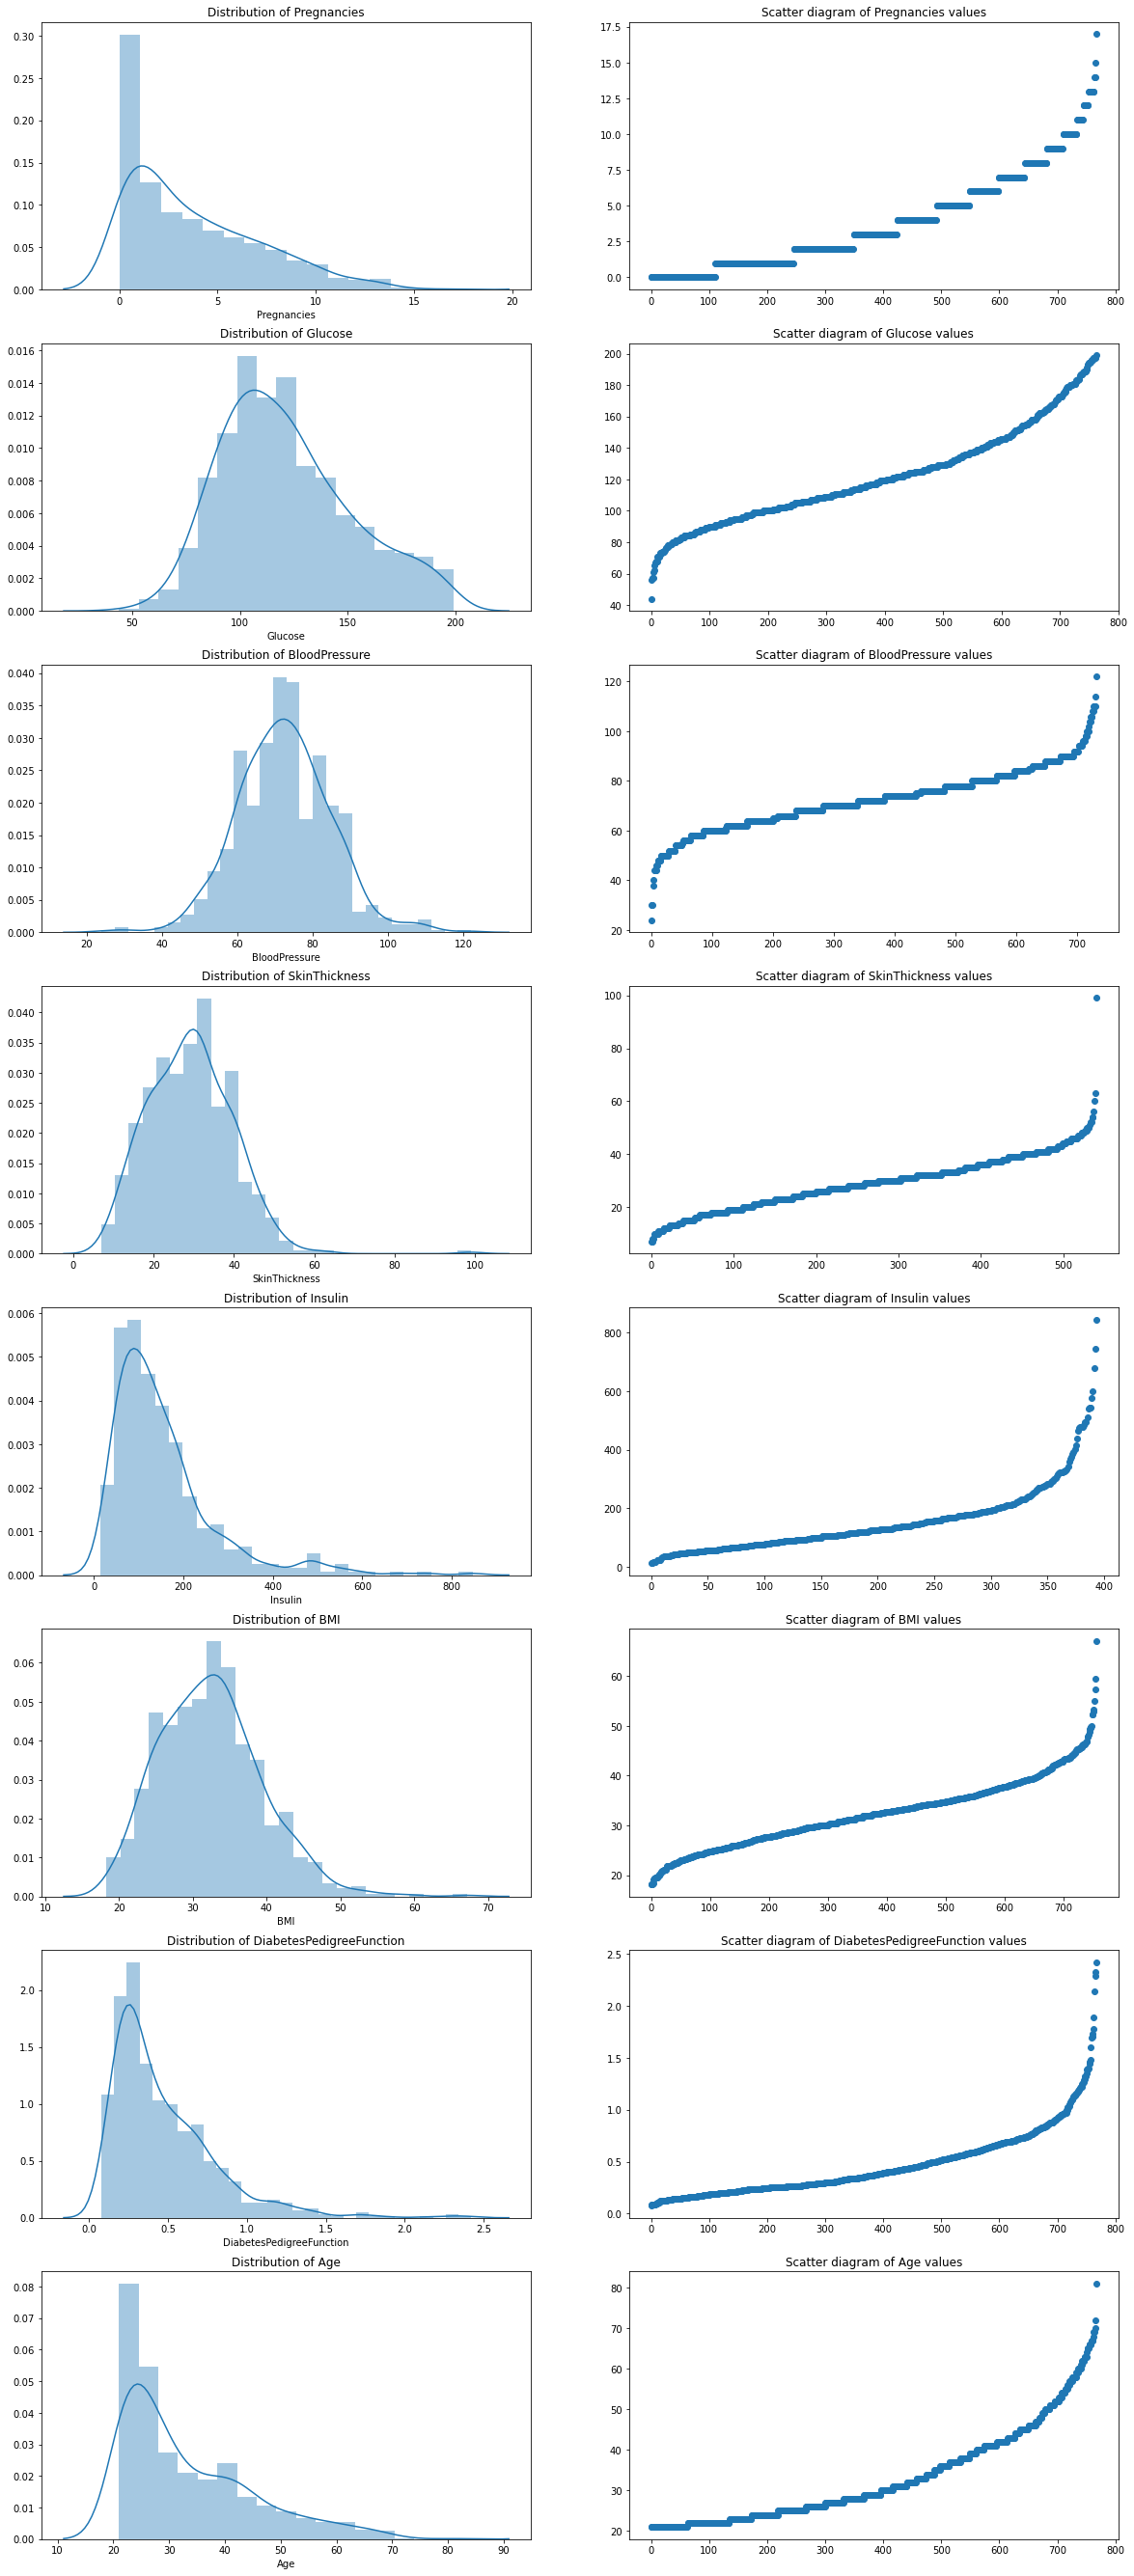

In [6]:
# checking the distribution of the variables (predictors)

columns = diabetes.columns [:-1]
nrows = columns.size
row_no = np.arange (1,nrows*2,2)

plt.figure (figsize = (20,6*nrows))

for row,col in zip (row_no, columns) :
    
    plt.subplot (nrows, 2, row)
    sns.distplot (diabetes [col])
    plt.title ('Distribution of {}'.format (col))
    
    plt.subplot (nrows, 2, row+1)
    col_values = diabetes [col].sort_values ()
    plt.scatter (range (col_values.size), col_values)
    plt.title ('Scatter diagram of {} values'.format (col));

##### Inferences :
    1. Out of the columns with missing values, insulin column has a skewed distribution. 
    2. Columns Glucose and BMI are slightly skewed
    3. Blood pressure, skin thickness have fairly normal distribution (excluding the missing values).
    4. The skin thickness column has an outlier.
    5. All remaining columns (Pregnancies, Diabetes pedigree function and age) are right skewed.
The above information will be used for imputing the missing values and column transformations.

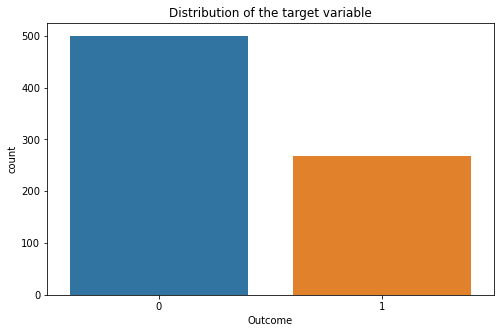

In [7]:
# Checking the distribution of the target column

plt.figure (figsize = (8,5))
sns.countplot (diabetes.Outcome)
plt.title ('Distribution of the target variable');

##### The people with diabetes are more than the people without diabetes which makes it an imbalanced data.
We will have to balance the data set before modeling.

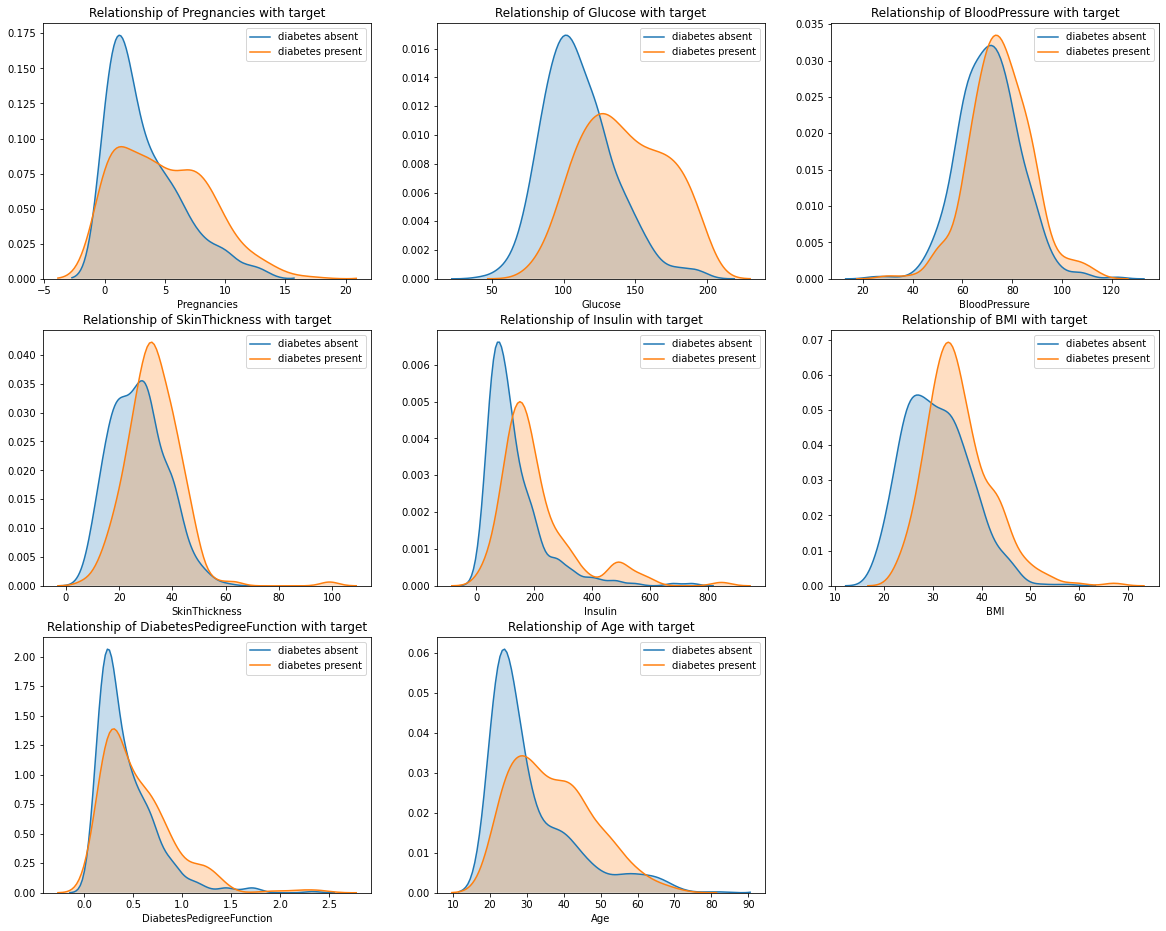

In [8]:
# Let's check the relationship of the predictors with the target variable

plt.figure (figsize = (20,16))

for i,col in enumerate (columns) :
    
    plt.subplot (3, 3, i+1)
    sns.distplot (diabetes [col] [diabetes.Outcome == 0], hist = False, kde_kws= {'shade' : True}, 
                  label = 'diabetes absent')
    sns.distplot (diabetes [col] [diabetes.Outcome == 1], hist = False, kde_kws= {'shade' : True},
                  label = 'diabetes present')
    plt.title ('Relationship of {} with target'.format (col))
    
plt.legend ()
plt.show ()

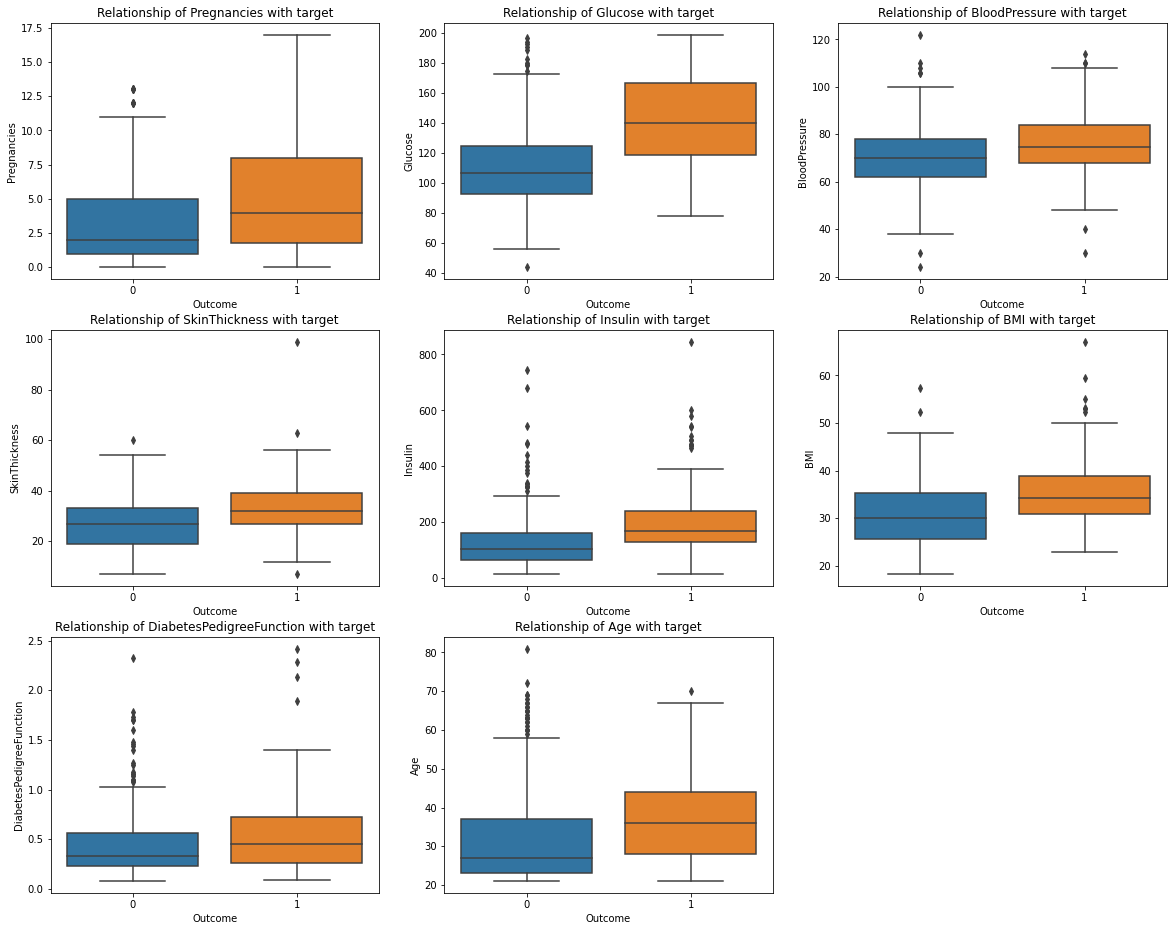

In [9]:
# Let's check the relationship of the predictors with the target variable

plt.figure (figsize = (20,16))

for i,col in enumerate (columns) :
    
    plt.subplot (3, 3, i+1)
    sns.boxplot (diabetes.Outcome, diabetes [col])
    plt.title ('Relationship of {} with target'.format (col))

plt.show ()

##### Inferences :
    1. Glucose has a very good relationship with the target.
    2. Insulin, Pregnancies and age have fairly good relationship.
    3. DiabetesPedigree and blood pressure function does not seem to have much relationship with the target.
    4. Remaining variables have slight relationship.

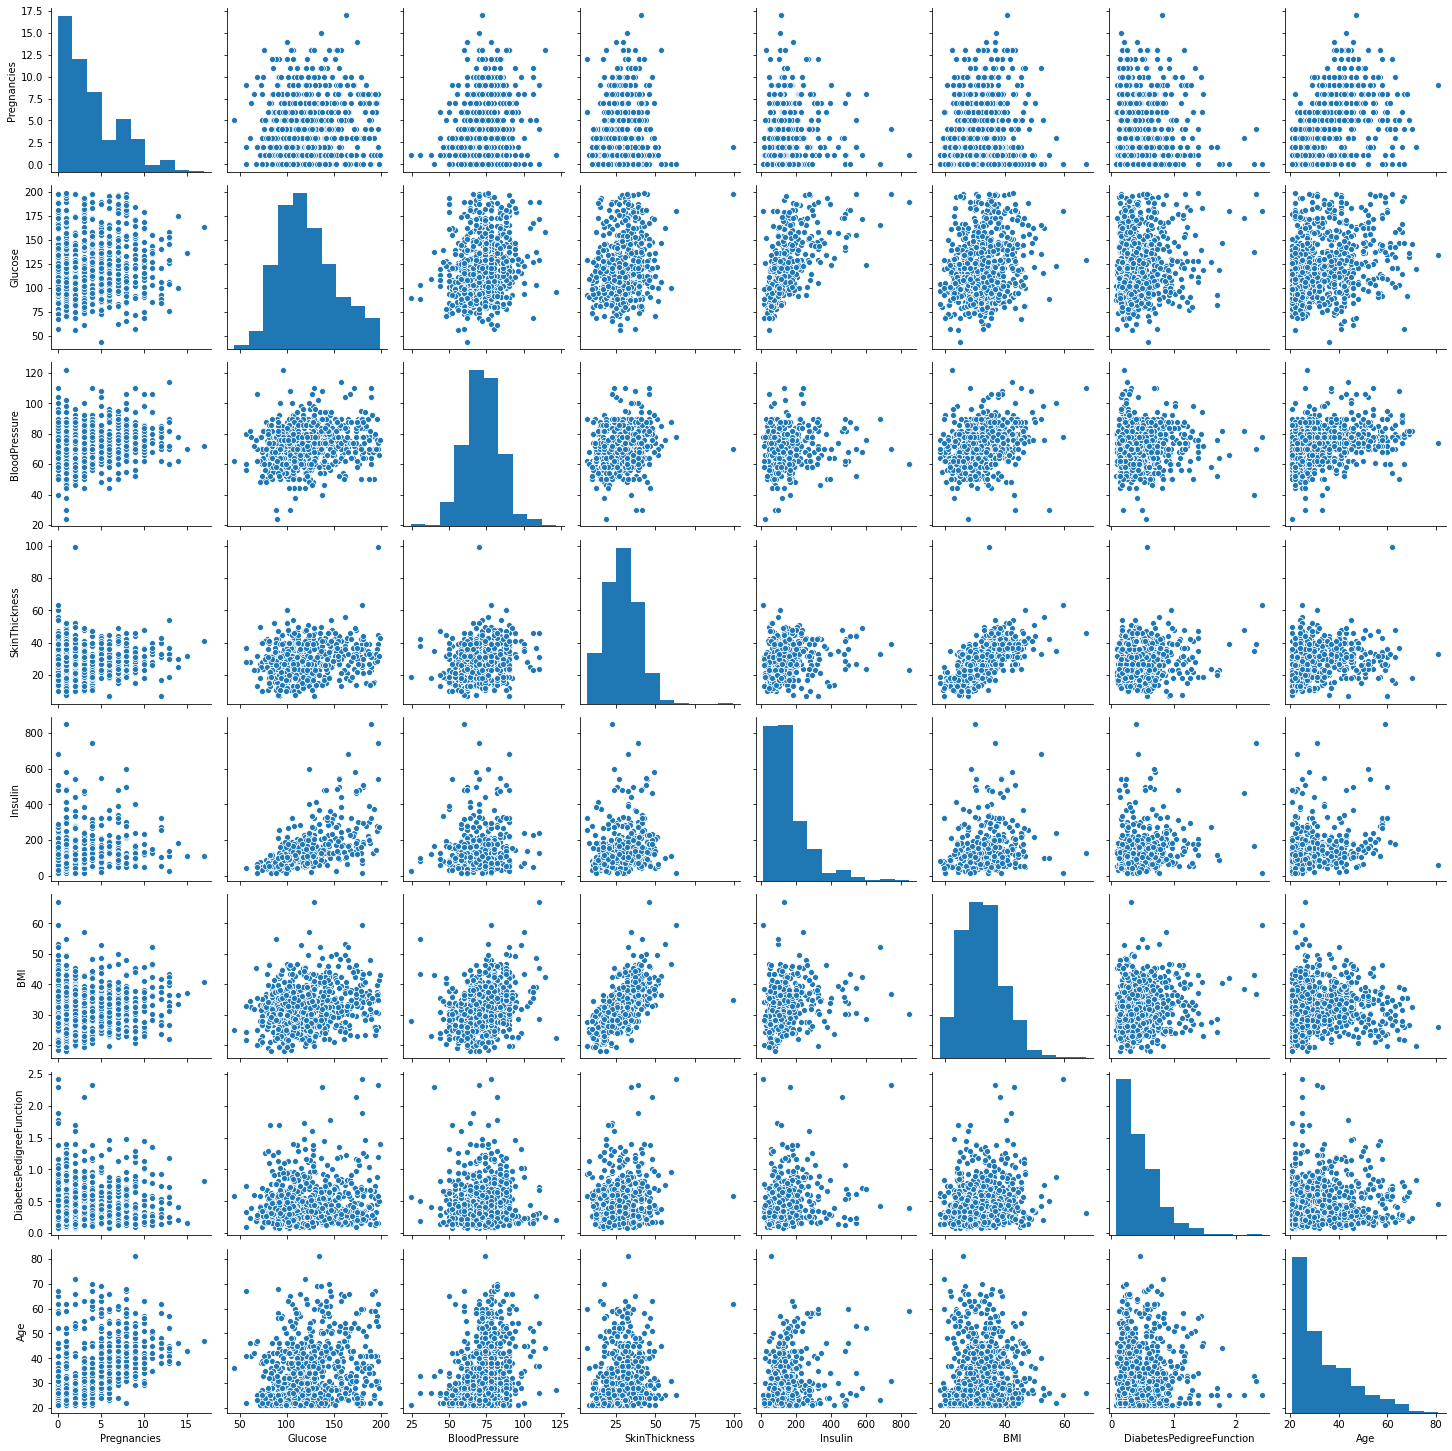

In [10]:
# Let's check the relationship between the predictors

sns.pairplot (diabetes [columns]);

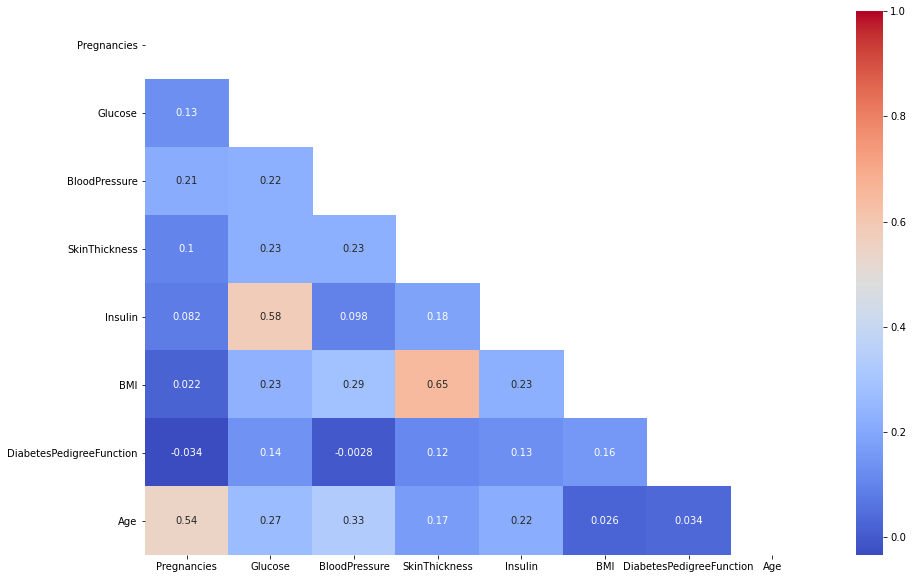

In [11]:
# Let's also perform correlation analysis

mask = np.triu (np.ones ((diabetes.shape[1]-1, diabetes.shape [1]-1)))
plt.figure (figsize=(15,10))
sns.heatmap (diabetes [columns].corr (), annot = True, mask = mask, cmap = 'coolwarm');

##### Inferences :
    1. BMI and skin thickness have a very good relationship.
    2. We can clearly see that there is an outlier in the skin thickness column.
    3. Insulin and Glucose also have a good relationship.

In [12]:
# Let's check the percentage of the missing values in the columns

diabetes.isna ().sum () [diabetes.isna ().any ()] / diabetes.shape [0]

Glucose          0.006510
BloodPressure    0.045573
SkinThickness    0.295573
Insulin          0.486979
BMI              0.014323
dtype: float64

##### We can drop the columns Skin thickness and insulin because of the following reasons :
    1. They have very high percentage of the missing values
    2. These 2 columns already have a high correlation with the other variables.
##### We can impute the missing values in the remaining columns as -
    1. impute the missing values in glucose and BMI with median because of the skewed data.
    2. impute the missing values in blood pressure with mean.

In [13]:
# Dropping the columns
diabetes_cl = diabetes.drop (columns = ['SkinThickness', 'Insulin'])

# imputing the missing values
diabetes_cl.Glucose = diabetes_cl.Glucose.fillna (diabetes_cl.Glucose.median ())
diabetes_cl.BMI = diabetes_cl.BMI.fillna (diabetes_cl.BMI.median ())
diabetes_cl.BloodPressure = diabetes_cl.BloodPressure.fillna (diabetes_cl.BloodPressure.mean ())

### Step 2 : Feature Engineering

In [14]:
# Let's check the feature importance

rf = RandomForestClassifier (n_estimators=10000, max_features = 3, max_depth = 1)
rf.fit (diabetes_cl.iloc [:,:-1], diabetes_cl.iloc [:,-1])
importance = pd.DataFrame ({'feature' : diabetes_cl.columns [:-1], 
                            'importance' : rf.feature_importances_}).sort_values ('importance', 
                                                                                  ascending = False)
importance

,feature,importance
1,Glucose,0.5064
5,Age,0.2272
3,BMI,0.2098
0,Pregnancies,0.0463
4,DiabetesPedigreeFunction,0.0082
2,BloodPressure,0.0021


##### inferences :
    1. Columns Diabetes pedigree function, pregnancies and blood pressure are least important.
    2. Glucose column is the most importance feature.
We can drop the columns least important columns.

In [15]:
X = diabetes_cl [importance.feature [:3].values]
y = diabetes_cl.Outcome

### Step 3 : Modeling
- We will have to balance the data set using class weights.
- We will use logistic regression, support vector machine, KNN and Random forest classifier as classification models.
- Since the data set is very small and is imbalanced, we will use statified k-fold cross validation technique.

In [16]:
# defining the weights for the imbalanced classes

weights = dict (X.shape [0] / (y.value_counts () * y.nunique ()))
print ('class weights =', weights)

class weights = {0: 0.768, 1: 1.4328358208955223}


In [17]:
# defining a function for building the model, hyperparameter tuning and presenting the results

def classification (clf, X, y, params, cv = 5, n_iter = 100) :
    
    # defining stratefied K-Fold
    
    skf = StratifiedKFold (n_splits = cv)
    
    # Using RandomizedSearchCV for hyperparameter tuning
    
    rand_cv = RandomizedSearchCV (estimator = clf, param_distributions = params, 
                                  cv = skf, scoring = 'f1_weighted', return_train_score = True,
                                  n_iter = n_iter, n_jobs = -1).fit (X, y)
    
    # displaying the best parameters and best score
    
    print ('The best parameters for {} = {}'.format (str (clf).partition ('(') [0], 
                                                     rand_cv.best_params_))
    
    print ('The best mean score = {:.4f}'.format (rand_cv.best_score_))
    
    # Making predictions
    
    # storing the cross validation results in the data frame
    
    cv_results = pd.DataFrame (rand_cv.cv_results_)
    
    # Plotting the cross validation results for the best estimator
    
    train_scores = cv_results.loc [rand_cv.best_index_, ['split{}_train_score'.format (i) for i in range (cv)]].values
    test_scores = cv_results.loc [rand_cv.best_index_, ['split{}_test_score'.format (i) for i in range (cv)]].values
    print ('Mean train score = {}, std = {}'.format (train_scores.mean (), train_scores.std ()))
    print ('Mean test score = {}, std = {}'.format (test_scores.mean (), test_scores.std ()))
    
    plt.figure (figsize = (15, 6))
    plt.ylim (0,1)
    plt.title ('Cross validation f1 score')
    
    # plotting train score
    plt.plot (range (cv), train_scores, color = 'b', label = 'train score')
    upperval_train = list (train_scores + train_scores.std())
    lowerval_train = list (train_scores - train_scores.std())
    plt.fill_between (range (cv), upperval_train, lowerval_train, color = 'b', alpha = 0.15)
    
    # Plotting test score
    plt.plot (range (cv), test_scores, color = 'r', label = 'test score')
    upperval_test = list (test_scores + test_scores.std())
    lowerval_test = list (test_scores - test_scores.std())
    plt.fill_between (range (cv), upperval_test, lowerval_test, color = 'r', alpha = 0.15)
    
    plt.legend ()
    plt.show ()
    
    return (rand_cv.best_estimator_)

##### Logistic Regression model

The best parameters for LogisticRegression = {'solver': 'liblinear', 'penalty': 'l2', 'C': 2.636650898730358}
The best mean score = 0.7520
Mean train score = 0.7497820905327786, std = 0.004491866218902647
Mean test score = 0.7519536383626327, std = 0.02736659152100972


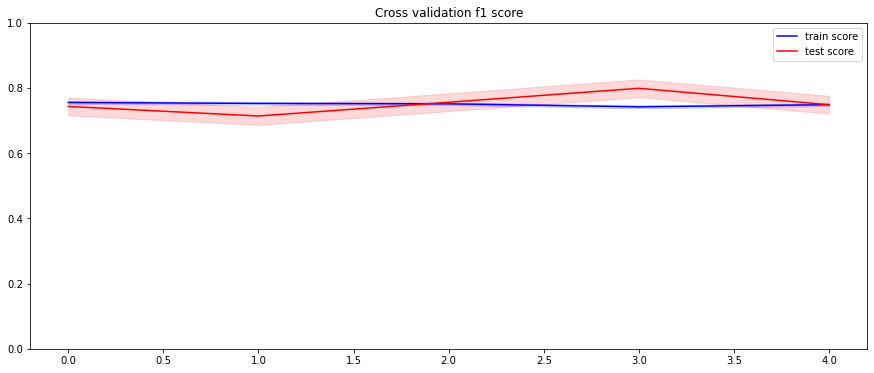

In [18]:
# Setting parameters for logistic regression model and finding the best results

params = {'solver' : ['newton-cg', 'lbfgs', 'liblinear'], 
          'penalty' : ['l1', 'l2', None], 
          'C' : np.logspace (-3, 2, 20)}

logmodel = LogisticRegression (class_weight = weights, max_iter = 500)

logmodel = classification (logmodel,X, y, params)

##### Support Vector Machine

The best parameters for SVC = {'kernel': 'rbf', 'gamma': 0.01, 'degree': 1, 'C': 4.832930238571752}
The best mean score = 0.7578
Mean train score = 0.7704796933001421, std = 0.00832354685854262
Mean test score = 0.7577693893154184, std = 0.024231432651239226


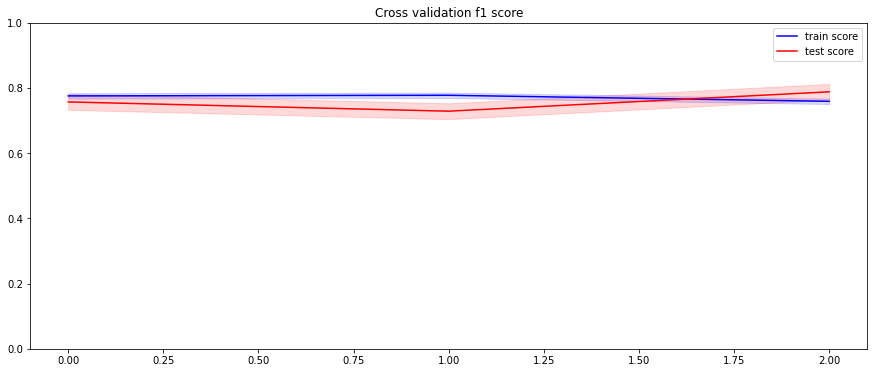

In [19]:
# Setting parameters for svc model and finding the best results

sc = StandardScaler ()
X_sc = sc.fit_transform (X)

params = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'], 
          'degree' : range (1,5), 
          'C' : np.logspace (-3, 2, 20), 
          'gamma' : [0.0001, 0.001, 0.01, 0.1, 1, 5, 10]}

svcmodel = SVC ()

svcmodel = classification (svcmodel, X_sc, y, params, cv = 3, n_iter = 10)

##### KNN Classifier

The best parameters for KNeighborsClassifier = {'weights': 'uniform', 'p': 1, 'n_neighbors': 17}
The best mean score = 0.7743
Mean train score = 0.7910051409787573, std = 0.01278263091557955
Mean test score = 0.7743276192796735, std = 0.033303341967372474


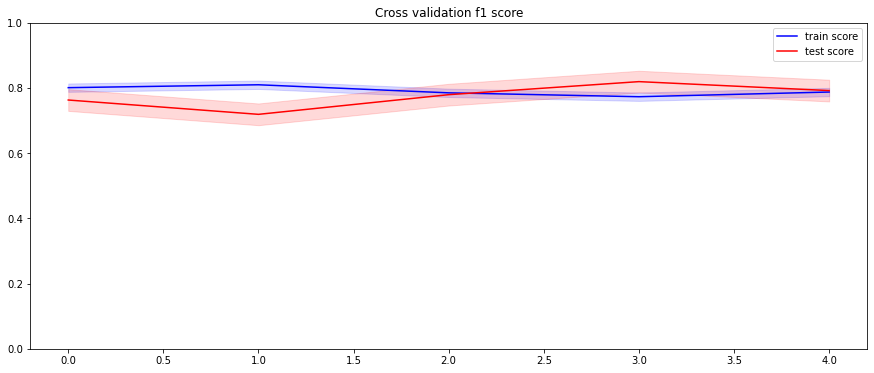

In [20]:
# Setting parameters for knn model and finding the best results

params = {'n_neighbors' : range (1, 20, 2), 
          'weights' : ['uniform', 'distance'], 
          'p' : range (1,5)}

knnmodel = KNeighborsClassifier (metric = 'minkowski', algorithm = 'brute')

knnmodel = classification (knnmodel, X_sc, y, params)

##### Random Forest

The best parameters for RandomForestClassifier = {'max_depth': 31}
The best mean score = 0.7594
Mean train score = 1.0, std = 0.0
Mean test score = 0.7593605022722253, std = 0.044989360655653524


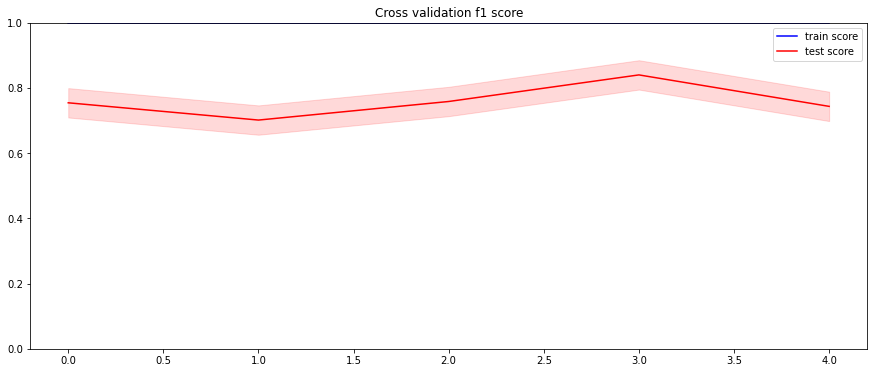

In [21]:
# Setting parameters for random forest model and finding the best results

params = {'max_depth' : range (1,50,5)}

rfmodel = RandomForestClassifier (class_weight = weights)

rfmodel = classification (rfmodel, X, y, params)

##### We see that the KNN performs best on this data set.
We will use the following techinques for classification -

- use stratefied train test split
- SMOTE technique for balancing the dataset.
- standardization using standard scaler.
- KNN model for classification.

In [22]:
# performing the train test split

X_train, X_test, y_train, y_test = train_test_split (X, y, stratify = y, test_size = 0.3, random_state = 23)
print ('The size of the train data =', X_train.shape [0])
print ('The size of the test data =', X_test.shape [0])

The size of the train data = 537
The size of the test data = 231


In [23]:
# balancing the data using SMOTE

oversampling = SMOTE (random_state=23)
X_train_os, y_train_os = oversampling.fit_resample (X_train, y_train)
print ('Before oversampling -')
print (y_train.value_counts ())
print ('\nAfter oversampling -')
print (y_train_os.value_counts ())

Before oversampling -
0    350
1    187
Name: Outcome, dtype: int64

After oversampling -
1    350
0    350
Name: Outcome, dtype: int64


##### The train data is balanced now. We scale the data and build the model now.

In [24]:
# scaling the features
X_train_os_sc = sc.fit_transform (X_train_os)
X_test_sc = sc.transform (X_test)

In [25]:
# Building the model
knnmodel.fit (X_train_os_sc, y_train_os)

# making the predictions on the test data
ypred = knnmodel.predict (X_test_sc)

In [26]:
# defining a function to plot roc curve

def plot_roc_curve(fpr, tpr, auc):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.annotate ('AUC = {}'.format (round (auc,2)), xy = (0.75,0.2), fontsize = 14)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Confusion matrix -


col_0,0,1
Outcome,,
0,105,45
1,17,64




Classification report -

              precision    recall  f1-score   support

           0       0.86      0.70      0.77       150
           1       0.59      0.79      0.67        81

    accuracy                           0.73       231
   macro avg       0.72      0.75      0.72       231
weighted avg       0.76      0.73      0.74       231



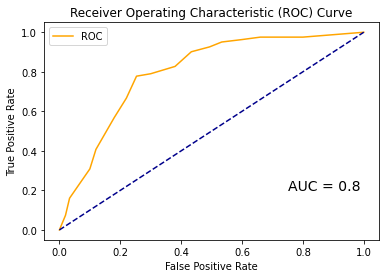

In [27]:
# Evaluation of the model

print ('Confusion matrix -')
display (pd.crosstab (y_test, ypred))

# printing the classification report
print ('\n\nClassification report -\n')
print (classification_report (y_test, ypred))


# getting the roc auc score
probs = knnmodel.predict_proba(X_test_sc)
probs = probs[:, 1]    # keeping the probability of the positive class only
auc = roc_auc_score(y_test, probs)

# plotting the roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve (fpr, tpr, auc)

##### inferences :
    1. We get the best KNN model with the following parameters -
        - number of neighbors = 17
        - 'uniform' weights
        - manhattan distance
        
    2. the evaluation scores are -
        - accuracy = 0.73
        - avg sensitivity (recall) = 0.75
        - avg precision = 0.72
        - avg f1 score = 0.72
        - AUC = 0.8

In [28]:
# exporting the data for further analysis

path2 = 'H:/Documents/Study material/Data Science course/Capstone Project/Project 2 - Healthcare PGP/diabetes_cleaned.csv'
diabetes_cl.to_csv (path2, index = False)

##### EDA using Tableau
Using only relevant columns
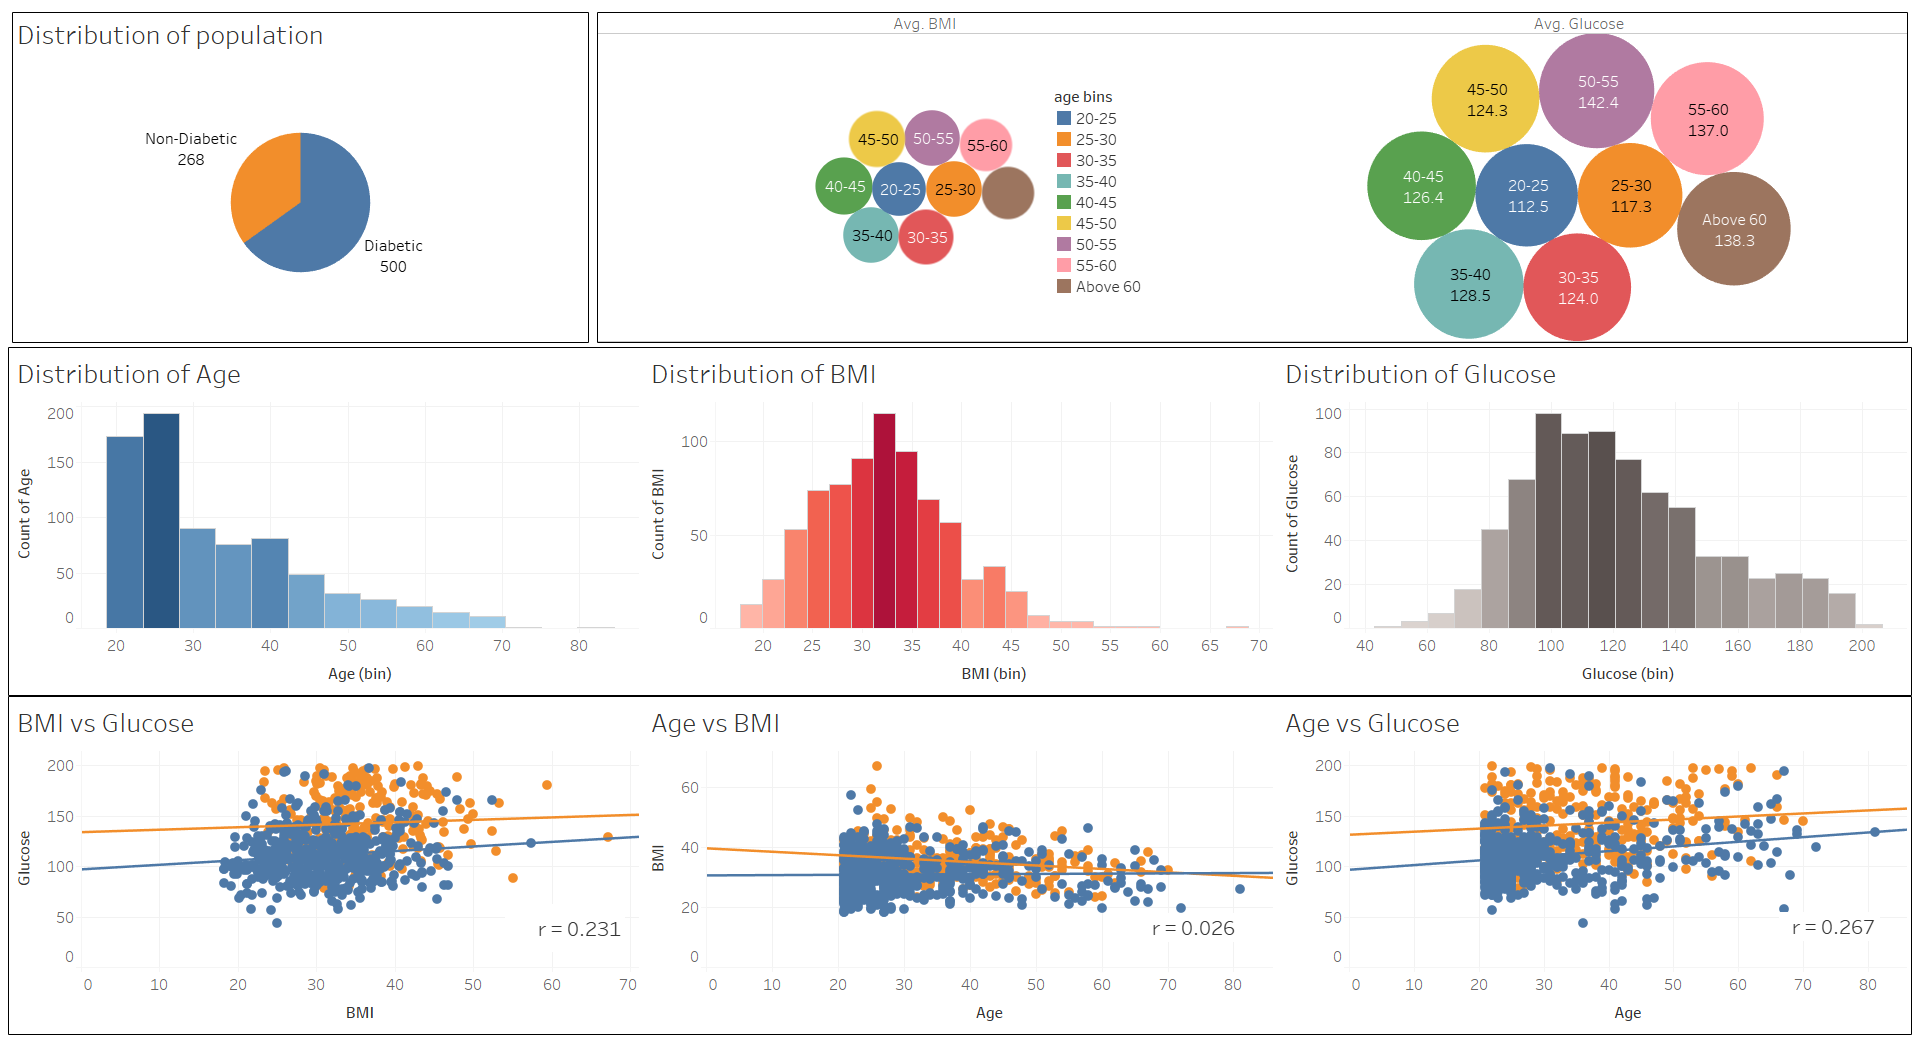

Please open the above dashboard using the following tableau profile link -

https://public.tableau.com/profile/sahaj.harnal#!/vizhome/Project2HealthcarePGP/Dashboard1

### Project completed by: Sahaj Harnal
### Email: sahajharnal@gmail.com